---

# Data Analysis on Global Terrorism

# I. 분석 개요 및 배경

## 1. 분석 배경
- 올해 미군의 아프가니스탄 철군과 탈레반의 정권 재장악, 카불 공항 테러 등 충격을 주는 사건들이 있었다.
- 미국인들의 삶은 물론 전 세계의 현대사를 바꿔놓은 9.11 사태가 발생한지, 그리고 '테러와의 전쟁'이 선포된지 20년이 지난 오늘, 세상은 더 안전해졌을까?
- 우리 일상 속 드물게만 기억되던, 상기되던 이 "테러"라는건 얼마나, 어떻게 변해왔는지 그리고 왜 발생했는지 알아보고자 분석을 진행하였다.

## 2. 분석 목적/목표
- 1970년대~2010년대까지의 전세계 테러 관련 데이터를 활용하여 테러 활동 추이와 현황을 파악하고, 테러 활동의 원인/요인을 분석한다.
- 발견된 문제과 이에 대한 인사이트/향후 과제를 제시한다.

## 3. 데이터 수집
- Kaggle에 공개 된 1970~2017년까지의 180,000 이상의 테러 활동/공격에 대한 데이터인 Global Terrorism Database (GTD)를 사용하였다.(https://www.kaggle.com/START-UMD/gtd)
- 135개의 컬럼이 존재하며, 해당 데이터에는 테러가 발생한 시점, 공격형태(암살, 폭탄 등), 국가, 지역(동아시아, 유럽 등), 부상자, 사망자, 테러의 발생 위도, 경도 정보 등이 있다.

---

# II. 분석 결과

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul # 이건 내가 만든 것
%matplotlib inline

import time
import re
import warnings
warnings.simplefilter(action='ignore') # 경고문구 무시

Hangul OK in your Windows!


In [3]:
terror_data = pd.read_csv('./globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror_data = terror_data[["eventid","iyear", "imonth", "iday","extended","resolution", "country", "country_txt", "region","region_txt","provstate" \
,"city","latitude","longitude","crit1","crit2","crit3","multiple","success","suicide","attacktype1","attacktype1_txt","attacktype2" \
,"attacktype2_txt", "targtype1","targtype1_txt","targsubtype1","targsubtype1_txt", "gname","gsubname","gname2","gsubname2", "weaptype1" \
,"weaptype1_txt","weapsubtype1","weapsubtype1_txt","nkill","nkillus","nkillter","nwound","nwoundus","nwoundte","property","propextent" \
,"propextent_txt", "propvalue", "ishostkid", "nhostkid"]]

In [5]:
terror_data['count'] = 1

In [6]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   resolution        2220 non-null    object 
 6   country           181691 non-null  int64  
 7   country_txt       181691 non-null  object 
 8   region            181691 non-null  int64  
 9   region_txt        181691 non-null  object 
 10  provstate         181270 non-null  object 
 11  city              181257 non-null  object 
 12  latitude          177135 non-null  float64
 13  longitude         177134 non-null  float64
 14  crit1             181691 non-null  int64  
 15  crit2             181691 non-null  int64  
 16  crit3             18

In [133]:
terror_data.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
extended                 0
resolution          179471
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
crit1                    0
crit2                    0
crit3                    0
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
gname                    0
gsubname            175801
gname2              179678
gsubname2           181531
weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
nkill                10313
n

---

## 9.11 사태 이후 20년, 세상은 테러로부터 더 안전해졌을까?

결론부터 얘기하자면, **아니다**.

## Number of Terrors

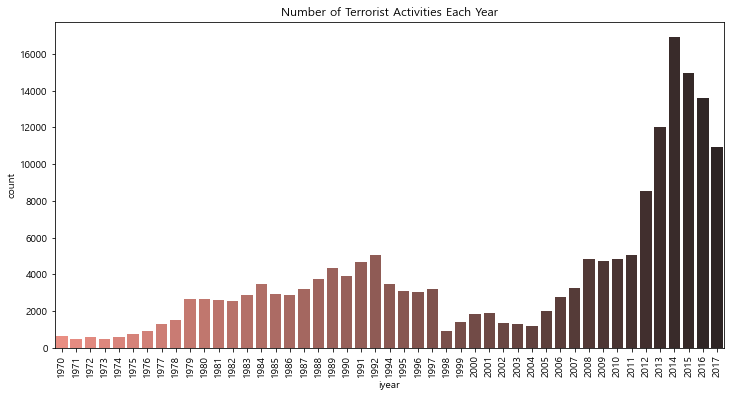

In [355]:
# number of terrors
# iyear: the year in which the incident occurred
plt.subplots(figsize=(12,6))
sns.countplot('iyear', data=terror_data, palette='dark:salmon_r')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show();

- 2011년 이후 테러 활동 수는 급격히 증가하였다.
- 2000년대에, 2001년 9.11 사태 이후 조금의 감소를 보였던 테러 건수는, 미국의 이라크 침공과 아프가니스탄에 대한 군사적 개입, 중동 지역에서의 수니/시아파 간 분쟁 증가, 정정 불안, 전쟁 도구로 테러 활용, 경제 문제에 대한 불만 고조 등의 이유로 테러 활동이 증가하기 시작하였다.
- 이후, 2011년 불어온 민주화 운동의 바람 '아랍의 봄'에 중동과 북아프리카 전역으로 반정부 시위가 번졌고 각국의 권위주의 정권이 속속 몰락했다. 하지만 '아랍의 봄'의 여파로, 내전과 경제난 등으로 혼란 상태가 지속되고 치안이 약해진 틈을 타 이슬람국가(IS)의 부상 등 극단주의 무장 조직의 급격한 활동 증가와 세력 확장이 이루어졌다.

## Fatalities

In [7]:
terror_data['nkillvictim'] = terror_data['nkill']-terror_data['nkillter']
terror_data.head(2)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,nkillvictim
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,1,NaN
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,0,NaN,NaN,NaN,1.0,1.0,1,NaN


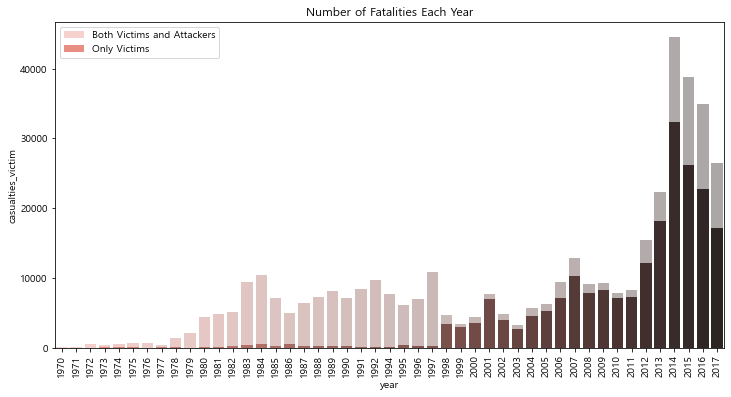

In [816]:
# number of fatalities
plt.subplots(figsize=(12,6))

# number of fatalities (both victims and attackers)
yearly_fatalities = terror_data.groupby('iyear')['nkill'].sum().to_frame().reset_index()
yearly_fatalities.columns = ['year','casualties']
sns.barplot(x=yearly_fatalities.year, y=yearly_fatalities.casualties, palette='dark:salmon_r', alpha=0.4, label='Both Victims and Attackers')

# number of fatalities (only victims)
yearly_fatalities_victim = terror_data.groupby('iyear')['nkillvictim'].sum().to_frame().reset_index()
yearly_fatalities_victim.columns = ['year','casualties_victim']
sns.barplot(x=yearly_fatalities_victim.year, y=yearly_fatalities_victim.casualties_victim, palette='dark:salmon_r', label='Only Victims')

plt.xticks(rotation=90)
plt.title('Number of Fatalities Each Year')
plt.legend()
plt.show();

## Injured

In [8]:
terror_data['nwoundvictim'] = terror_data['nwound']-terror_data['nwoundte']
terror_data.head(2)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,nkillvictim,nwoundvictim
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,0,NaN,NaN,NaN,0.0,NaN,1,NaN,NaN
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,0,NaN,NaN,NaN,1.0,1.0,1,NaN,NaN


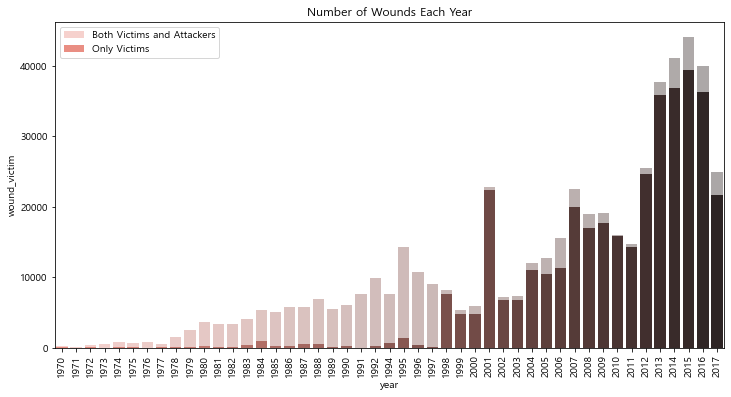

In [382]:
# number of the injured
plt.subplots(figsize=(12,6))

# number of the injured (both victims and attackers)
yearly_wounds = terror_data.groupby('iyear')['nwound'].sum().to_frame().reset_index()
yearly_wounds.columns = ['year','wound']
sns.barplot(x=yearly_wounds.year, y=yearly_wounds.wound, palette='dark:salmon_r', alpha=0.4, label='Both Victims and Attackers') #alpha: 투명도

# number of the injured (only victims)
yearly_wounds_victim = terror_data.groupby('iyear')['nwoundvictim'].sum().to_frame().reset_index()
yearly_wounds_victim.columns = ['year','wound_victim']
sns.barplot(x=yearly_wounds_victim.year, y=yearly_wounds_victim.wound_victim, palette='dark:salmon_r', label='Only Victims')

plt.xticks(rotation=90)
plt.title('Number of Wounds Each Year')
plt.legend()
plt.show();

- 테러 활동의 증가와 함께 사상자(사망자+부상자) 수 또한 급격히 증가하였다.

## Types of Attack

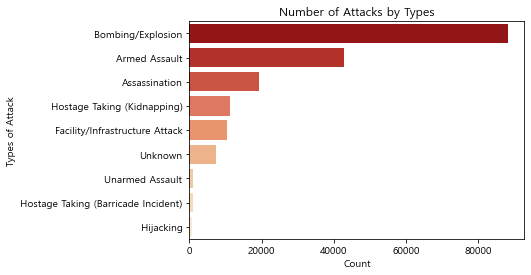

In [545]:
sns.barplot(x=terror_data['attacktype1_txt'].value_counts().values, y=terror_data['attacktype1_txt'].value_counts().index, palette='OrRd_r')
plt.title('Number of Attacks by Types')
plt.xlabel('Count')
plt.ylabel('Types of Attack')
plt.xticks(rotation=0)
plt.show();

- 테러 공격 유형으로는 Bombing/Explosion이 그 수가 가장 많으며, 그 다음으로 Armed Assult가 많이 발생했다.

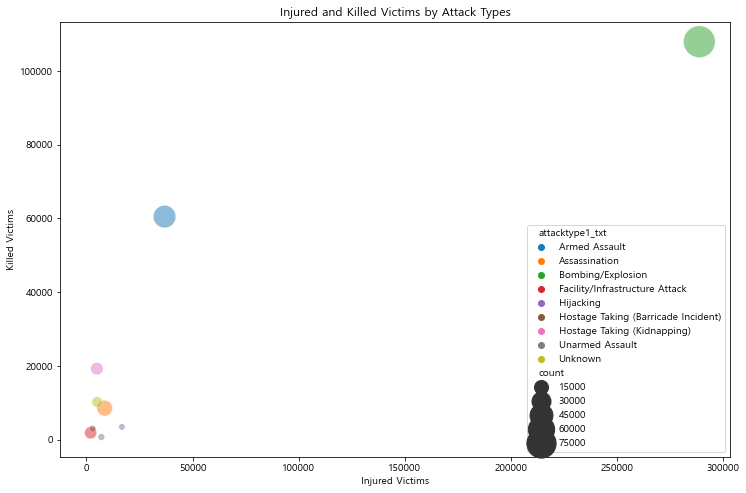

In [173]:
weapon_injury = terror_data.groupby('attacktype1_txt')['nwoundvictim'].sum()
weapon_fatality = terror_data.groupby('attacktype1_txt')['nkillvictim'].sum()
weapon_text = weapon_injury.index
weapon_count = terror_data.groupby('attacktype1_txt')['count'].sum()

plt.figure(figsize=(12,8))
sns.scatterplot(x=weapon_injury, y=weapon_fatality, hue=weapon_text, size=weapon_count, \
                sizes=(40, 1000), legend='auto', alpha=0.5)
#plt.annotate(weapon_text, (weapon_injury.index, weapon_fatality.index))
plt.title('Injured and Killed Victims by Attack Types')
plt.xlabel('Injured Victims')
plt.ylabel('Killed Victims')
plt.show();

- 발생 건수뿐만 아니라, Bombing/Explosion에 의한 사상자가 테러 공격 유형 중 가장 많았으며, 이어서 Armed Assault가 두 번째로 많았다

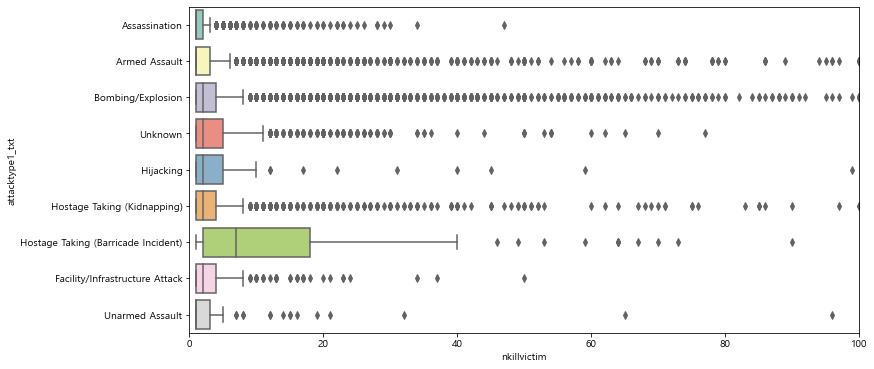

In [467]:
# 각 공격 유형별 사망자 수 분포 조회
plt.figure(figsize=(12,6))
sns.boxplot(x='nkillvictim', y='attacktype1_txt', data=terror_data[terror_data['nkillvictim'] > 0], palette='Set3')
plt.xlim(0,100) # 사망자 수 100까지로만 제한해서 조회
plt.show();

In [476]:
terror_data[(terror_data['attacktype1_txt']=='Hostage Taking (Barricade Incident)') & (terror_data['nkillvictim']>0)]['nkillvictim'].describe()

count    153.000000
mean      19.084967
std       39.645792
min        1.000000
25%        2.000000
50%        7.000000
75%       18.000000
max      317.000000
Name: nkillvictim, dtype: float64

- 공격 유형별로, 특히 Bombing/Explosion과 Armed Assault의 사망자 분포에 있어 극단치로 인해 차이가 커서, 사망자가 발생한 건들 중 사망자 수를 100으로 제한해서 분포를 조회 했다.
- Q1-Q3 사분위간 범위/사망자 수 크기에 있어선 대부분 1-5명이지만, Hostage Taking은 2~18명으로 다른 공격 유형에 비해 상대적으로 큰 것으로 나타났다. 즉, 각 공격 유형별 데이터의 50%를 놓고 봤을 때, Hostage Taking으로 인한 사망자 수가 더 많은 것 같다.

In [529]:
# bombing/explosion과 armed assault의 무기 유형에 따른 상위 10개 조회
explosive_aremd_attack_df = terror_data[(terror_data['attacktype1_txt'] == 'Bombing/Explosion') | (terror_data['attacktype1_txt'] == 'Armed Assault')]
explosive_aremd_attack_df = explosive_aremd_attack_df[explosive_aremd_attack_df['nkillvictim'] > 0]
explosive_aremd_attack_df.groupby('attacktype1_txt')['weaptype1_txt'].value_counts().nlargest(10).to_frame('count').reset_index(1)

,weaptype1_txt,count
attacktype1_txt,,
Bombing/Explosion,Explosives,23183
Armed Assault,Firearms,15947
Armed Assault,Explosives,816
Armed Assault,Melee,616
Armed Assault,Incendiary,150
Bombing/Explosion,Firearms,58
Armed Assault,Unknown,53
Bombing/Explosion,Chemical,17
Bombing/Explosion,Incendiary,11


## Suicide
- those cases where there is evidence that the perpetrator did not intend to escape from the attack alive

In [786]:
suicide_rate = round(terror_data['suicide'].value_counts(normalize=True)*100, 1).to_frame()
suicide_rate

,suicide
0,96.3
1,3.7


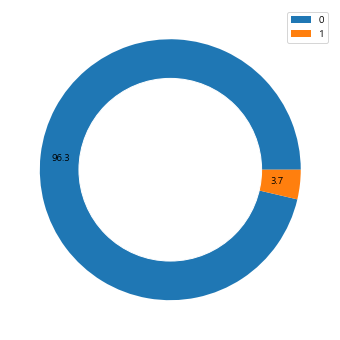

In [821]:
fig = plt.figure(facecolor='white', figsize=(6,6))
plt.pie(x=terror_data['suicide'].value_counts().values, labels=suicide_rate.suicide, labeldistance=0.77)
plt.legend(terror_data['suicide'].value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show();

- 지금까지의 모든 테러 중 자살 공격은 약 4%였다.

In [804]:
suicie_by_attacktype = round(terror_data[terror_data['suicide'] == 1]['attacktype1_txt'].value_counts(normalize=True)*100, 1).to_frame()
suicie_by_attacktype

,attacktype1_txt
Bombing/Explosion,93.7
Assassination,3.9
Hostage Taking (Barricade Incident),0.8
Armed Assault,0.7
Hostage Taking (Kidnapping),0.6
Hijacking,0.2
Unknown,0.0
Unarmed Assault,0.0
Facility/Infrastructure Attack,0.0


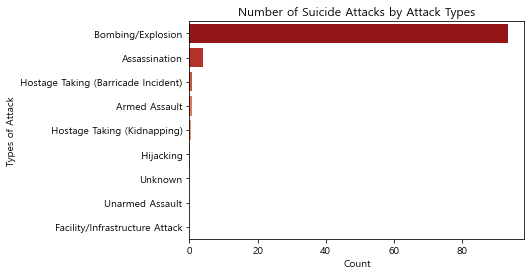

In [809]:
sns.barplot(x=suicie_by_attacktype.attacktype1_txt, y=suicie_by_attacktype.index, palette='OrRd_r')
plt.title('Number of Suicide Attacks by Attack Types')
plt.xlabel('Count')
plt.ylabel('Types of Attack')
plt.xticks(rotation=0)
plt.show();

- 자살 공격의 대부분은 Bombing/Explosion 공격이었다.

In [853]:
terror_data[(terror_data['attacktype1_txt'] == 'Bombing/Explosion')].groupby('suicide')['count'].sum()

suicide
0    82041
1     6214
Name: count, dtype: int64

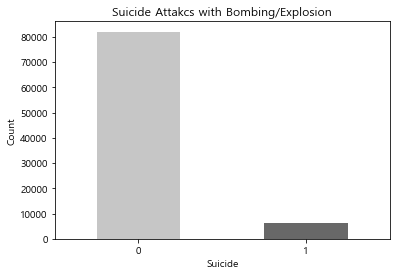

In [856]:
terror_data[(terror_data['attacktype1_txt'] == 'Bombing/Explosion')]['suicide'].value_counts().plot.bar(color=sns.color_palette('Greys', 2), stacked=True)
plt.title('Suicide Attakcs with Bombing/Explosion')
plt.xlabel('Suicide')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

In [815]:
(terror_data[(terror_data['attacktype1_txt'] == 'Bombing/Explosion')]['suicide'].value_counts().to_frame())\
.join(round(terror_data[(terror_data['attacktype1_txt'] == 'Bombing/Explosion')]['suicide'].value_counts(normalize=True)*100, 1), lsuffix='_bomb', rsuffix='_bomb_rate')

,suicide_bomb,suicide_bomb_rate
0,82041,93.0
1,6214,7.0


- 그리고 Bombing/Explosion 테러 공격 유형의 약 7%가 자살 공격이었다.

## Terrorist Attackers/Groups

In [407]:
# top terrorist groups based on the number of attacks
terror_groups_over_100 = terror_data['gname'].value_counts().nlargest(11).to_frame()
terror_groups_over_100

,gname
Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


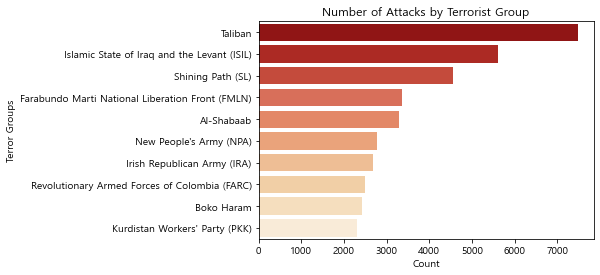

In [546]:
# (Unknown 제외) top 10 terror groups
sns.barplot(x=terror_groups_over_100[1:].gname, y=terror_groups_over_100[1:].index, palette='OrRd_r')
plt.title('Number of Attacks by Terrorist Group')
plt.xlabel('Count')
plt.ylabel('Terror Groups')
plt.xticks(rotation=0)
plt.show();

- ('Unknown'을 제외한) Attacker가 파악이 된 테러 공격 중, Taliban에 의한 테러 활동이 가장 많았고, 다음으로 Islamic State, Shining Path (SL), FMLN 순으로 테러 활동 수가 가장 많았다.

## Types of Target

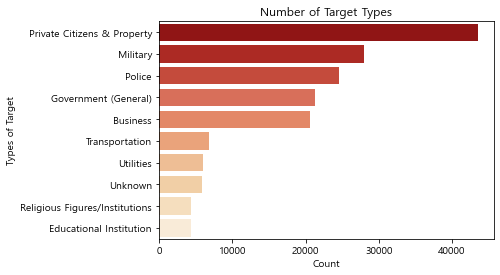

In [547]:
# Top 10 target types
sns.barplot(x=terror_data['targtype1_txt'].value_counts().nlargest(10).values, y=terror_data['targtype1_txt'].value_counts().nlargest(10).index, palette='OrRd_r')
plt.title('Number of Target Types')
plt.xlabel('Count')
plt.ylabel('Types of Target')
plt.xticks(rotation=0)
plt.show();

- 테러로 인한 피해자 중 민간(Private Citizens & Property)에 대한 공격 빈도수가 가장 많았으며, 그 다음 순으로 군대/군인(Military), 경찰(Police), 정부(Government (General)), 기업(Business)에 대한 공격이 많았다.

In [ ]:
# terror_data.to_csv('terror_data.csv', sep=',')
# pd.read_csv('terror_data.csv', index_col=0)

## Goals/Inclusion Criteria
- Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
- Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2)
- Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)
- 1 = "Yes" / The incident meets the criterion.
- 0 = "No" / The incident does not meet the criterion.

In [608]:
# number of terror attacks aimed at attaining a POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
(terror_data['crit1'].value_counts().to_frame())\
.join(round(terror_data['crit1'].value_counts(normalize=True)*100, 1).to_frame(), rsuffix='_percent')

,crit1,crit1_percent
1,179607,98.9
0,2084,1.1


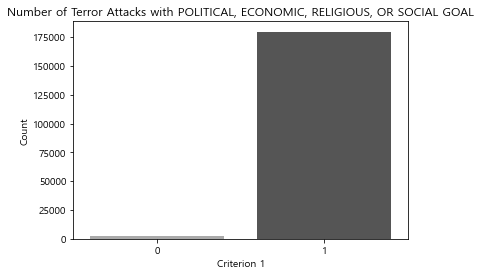

In [588]:
sns.barplot(x=terror_data['crit1'].value_counts().index, y=terror_data['crit1'].value_counts().values, palette='gray_r')
plt.title('Number of Terror Attacks with POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL')
plt.xlabel('Criterion 1')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

- 약 99%의 테러 활동이 정치, 경제, 종교, 또는 사회적 목적을 가진 것으로 나타났다.

In [607]:
# number of terror attacks wth an INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2)
(terror_data['crit2'].value_counts().to_frame())\
.join(round(terror_data['crit2'].value_counts(normalize=True)*100, 1).to_frame(), rsuffix='_percent')

,crit2,crit2_percent
1,180436,99.3
0,1255,0.7


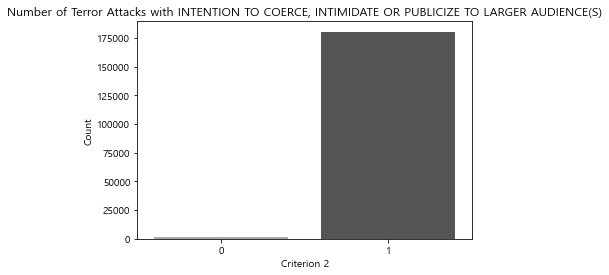

In [593]:
sns.barplot(x=terror_data['crit2'].value_counts().index, y=terror_data['crit2'].value_counts().values, palette='gray_r')
plt.title('Number of Terror Attacks with INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)')
plt.xlabel('Criterion 2')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

- 약 99%의 테러 활동이 더 큰 규모로 강압, 위협, 또는 홍보를 하려는 의도가 있었다.

In [609]:
# number of terror attacks which are OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)
(terror_data['crit3'].value_counts().to_frame())\
.join(round(terror_data['crit3'].value_counts(normalize=True)*100, 1).to_frame(), rsuffix='_percent')

,crit3,crit3_percent
1,159101,87.6
0,22590,12.4


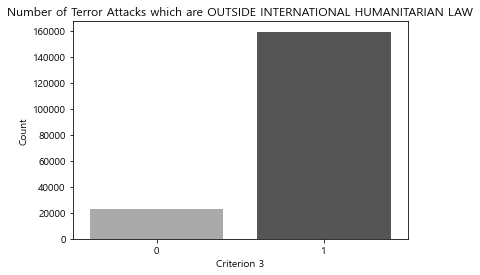

In [610]:
sns.barplot(x=terror_data['crit3'].value_counts().index, y=terror_data['crit3'].value_counts().values, palette='gray_r')
plt.title('Number of Terror Attacks which are OUTSIDE INTERNATIONAL HUMANITARIAN LAW')
plt.xlabel('Criterion 3')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

- 약 87%의 테러 활동이 국제 인도주의법에 위배되었다.

## Number of Successful Terrorist Strikes

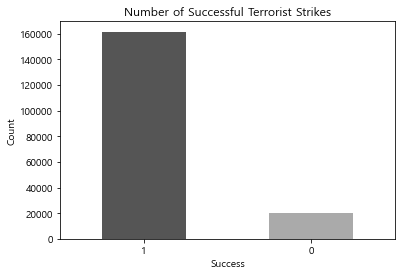

In [720]:
# Success of Terrorist Strike
# 1: The incident was successful. 
# 0: The incident was not successful.
terror_data['success'].value_counts().plot(kind='bar', color=sns.color_palette('gray', 2))
plt.title('Number of Successful Terrorist Strikes')
plt.xlabel('Success')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

In [331]:
round(terror_data['success'].value_counts(normalize=True)*100, 1).apply(lambda x: str(x)+"%")

1    89.0%
0    11.0%
Name: success, dtype: object

## Number of Extended Terrorist Attacks

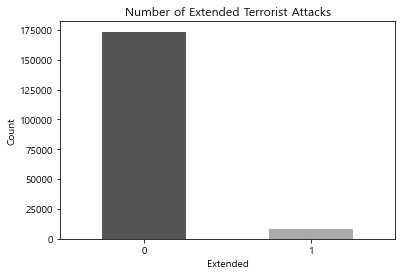

In [721]:
# Number of Extended Terrorist Attacks
# 1: The duration of an incident extended more than 24 hours
# 0: The duration of an incident extended less than 24 hours.
terror_data['extended'].value_counts().plot(kind='bar', color=sns.color_palette('gray', 2))
plt.title('Number of Extended Terrorist Attacks')
plt.xlabel('Extended')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

- 전체 테러 공격 중 약 95%가 24시간 미만, 약 5%의 테러만 24시간 이상 지속되었다.

In [328]:
round(terror_data['extended'].value_counts(normalize=True)*100, 1).apply(lambda x: str(x)+"%")

0    95.5%
1     4.5%
Name: extended, dtype: object

In [155]:
# average number of killed victims by 'extended'
avg_nkillvictim_by_extended = terror_data.groupby('extended')['nkillvictim'].sum() / terror_data['extended'].value_counts()
avg_nkill_by_extended = terror_data.groupby('extended')['nkill'].sum() / terror_data['extended'].value_counts()

pd.concat([avg_nkillvictim_by_extended.rename('avg_nkill_victim'), avg_nkill_by_extended.rename('avg_nkill_all')], axis=1)

,avg_nkill_victim,avg_nkill_all
extended,,
0,1.140281,2.231171
1,2.109115,3.018206


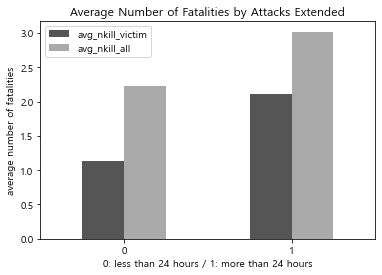

In [160]:
pd.concat([avg_nkillvictim_by_extended.rename('avg_nkill_victim'), avg_nkill_by_extended.rename('avg_nkill_all')], axis=1)\
.plot(kind='bar', color=sns.color_palette('gray', 2))
plt.title('Average Number of Fatalities by Attacks Extended')
plt.xlabel('0: less than 24 hours / 1: more than 24 hours')
plt.ylabel('average number of fatalities')
plt.xticks(rotation=0)
plt.show();

- 하지만 24시간 이상 지속된 테러 공격으로 인한 피해가 24시간 미만의 테러 공격보다 더 높은 평균 사상자를 냈다. 24시간 미만 테러 공격으로는 평균적으로 1.1명의 사상자(only victims)가 발생하였지만, 24시간 이상 지속된 테러 공격은 평균 2.1명의 사상자(only victims)가 발생했다. Victims와 Attackers 모두 합쳐서는 각각 평균 2.2명, 3.0명의 사상자가 발생했다.
- 테러 발생시 조기에, 신속히 진압 및 해결하는 것이 더 큰 피해를 막는데 중요 할 것으로 보인다.

## Top 10 Most Attacked Countries

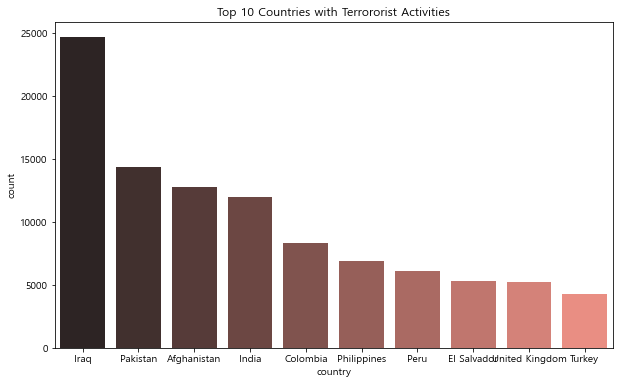

In [187]:
# top 10 most attacked countries
plt.figure(figsize=(10,6))
sns.countplot(top_10_country_data['country_txt'], order=top_10_country_data['country_txt'].value_counts().index, palette='dark:salmon')
plt.title('Top 10 Countries with Terrororist Activities')
plt.xlabel('country')
plt.ylabel('count')
plt.show();

- 1970년부터 2017년 사이 Iraq, Pakistan, Afghanistan, India 등의 순서로 가장 많은 테러가 발생 했다.

In [441]:
# top 10 countries - number of injured and killed and average number of casualties
top_10_country_index = terror_data['country_txt'].value_counts().head(10).index
top_10_country_data = terror_data[terror_data['country_txt'].isin(top_10_country_index)]
temp = top_10_country_data.groupby(by='country_txt')[['nkill','nwound','count']].sum()
temp['avg_casualties'] = temp['nkill']+temp['nwound'] / temp['count']
temp.sort_values('avg_casualties', ascending=False)

,nkill,nwound,count,avg_casualties
country_txt,,,,
Iraq,78589.0,134690.0,24636,78594.467202
Afghanistan,39384.0,44277.0,12731,39387.477889
Pakistan,23822.0,42038.0,14368,23824.925807
India,19341.0,28980.0,11960,19343.423077
Colombia,14698.0,10328.0,8306,14699.243438
Peru,12771.0,4078.0,6096,12771.668963
El Salvador,12053.0,5062.0,5320,12053.951504
Philippines,9559.0,13367.0,6908,9560.935003
Turkey,6888.0,9899.0,4292,6890.306384


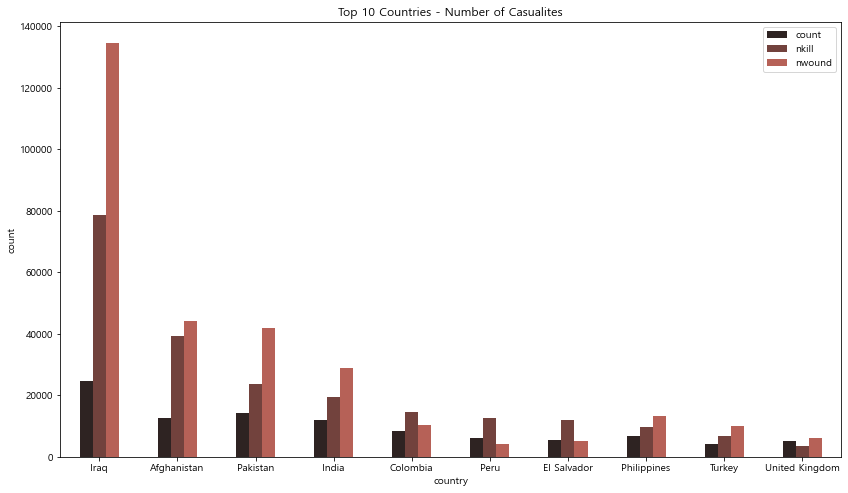

In [548]:
top_10_country_data.groupby(by='country_txt')[['count','nkill','nwound']].sum().sort_values('nkill', ascending=False).plot(kind='bar', figsize=(14,8), color=sns.color_palette('dark:salmon', 4))
plt.title('Top 10 Countries - Number of Casualites')
plt.xlabel('country')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show();

- Top 10 국가별 테러 건수와 사상자를 비교해 보면, Iraq, Afghanistan, Pakistan, India 등의 국가는 테러 발생 수에 비해 다른 국가들 보다 상대적으로 더 많은 사상자가 발생했다.

In [259]:
# 원인 파악을 위해 top 10 국가의 attack type르 조회해 보니, bombing/explosion과 armed assault 공격이 가장 많았다
top_10_country_data['attacktype1_txt'].value_counts().to_frame()

,attacktype1_txt
Bombing/Explosion,51529
Armed Assault,22708
Assassination,10857
Hostage Taking (Kidnapping),6086
Facility/Infrastructure Attack,3880
Unknown,3726
Hostage Taking (Barricade Incident),490
Unarmed Assault,378
Hijacking,198


In [258]:
# 각 국가별, 공격 유형을 건수를 보니, Iraq, Pakistan, Afghanistan, India의 Bombinb/Explosion과 Armed Assault 건수가 상위를 차지한다
top_10_country_data.groupby('country_txt')['attacktype1_txt'].value_counts().nlargest(10).to_frame()

,,attacktype1_txt
country_txt,attacktype1_txt,
Iraq,Bombing/Explosion,18286
Pakistan,Bombing/Explosion,7613
Afghanistan,Bombing/Explosion,6245
India,Bombing/Explosion,4825
Pakistan,Armed Assault,3859
India,Armed Assault,3184
Iraq,Armed Assault,3155
Colombia,Bombing/Explosion,3128
Peru,Bombing/Explosion,3115


- 10개 국가의 상위 공격 유형을 살펴보니, Iraq, Pakistan, Afghanistan, India의 Bombing/Explosion과 Armed Assault가 가장 큰 빈도수를 차지한다.

In [251]:
# 이 4개 국가에 대해서만 공격 유형별 건수/비율을 조회
top_4_country = top_10_country_data[top_10_country_data['country_txt'].isin(['Iraq','Afghanistan','Pakistan','India'])]
pd.crosstab(top_4_country['country_txt'], top_4_country['attacktype1_txt'], margins=True).sort_values('All', ascending=False).iloc[1:, :-1]

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country_txt,,,,,,,,,
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
India,3184,1229,4825,996,43,44,1184,143,312


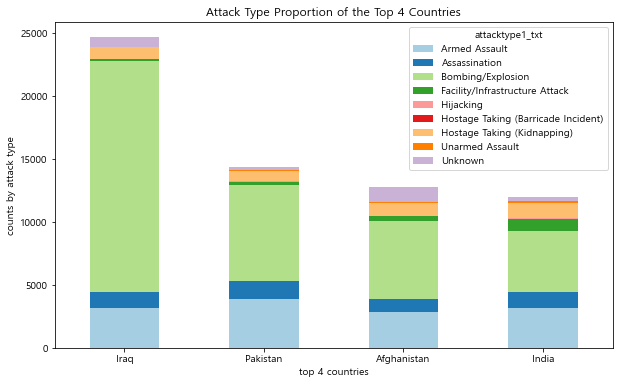

In [549]:
pd.crosstab(top_4_country['country_txt'], top_4_country['attacktype1_txt'], margins=True).sort_values('All', ascending=False).iloc[1:, :-1]\
.plot.bar(stacked=True, figsize=(10,6), color=sns.color_palette('Paired', 9))
plt.xticks(rotation=0)
plt.title('Attack Type Proportion of the Top 4 Countries')
plt.xlabel('top 4 countries')
plt.ylabel('counts by attack type')
plt.show();

- 이는 위에서 언급했던, Bombing/Explosion과 Armed Assault로 인한 사상자 수가 다른 공격 유형에 비해 큰 것과 관계가 있는 것으로 생각된다.
- 위 4개 국가에선 큰 사상자를 만드는 Bombing/Explosion과 Armed Assault 발생 건수와 비율이 높다. 이 때문에, 4개 국가에선 테러 건수 대비 더 많은 사상자가 발생한 것 같다.

### Regions

In [139]:
# number of attacks by regions
terror_data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

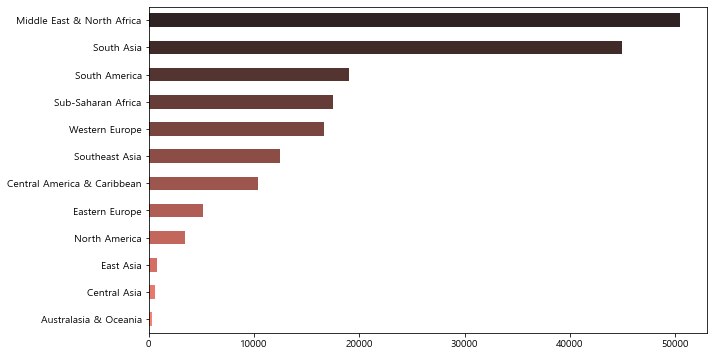

In [554]:
terror_data['region_txt'].value_counts(ascending=True).plot(kind='barh', figsize=(10,6), color=sns.color_palette('dark:salmon_r',12));

- 지역별로 보면, Middle East & North Africa, South Asia, South America, Sub-Saharan Africa, Western Europe에서 가장 많은 테러가 발생했다.

In [443]:
# number of casualties by regions
terror_data.groupby('region_txt')[['nkillvictim','nwoundvictim']].sum()\
.join(terror_data.groupby('region_txt')[['nkillvictim','nwoundvictim']].sum().sum(axis=1).to_frame('total'))\
.sort_values('total', ascending=False)

,nkillvictim,nwoundvictim,total
region_txt,,,
Middle East & North Africa,94936.0,177367.0,272303.0
South Asia,54056.0,96751.0,150807.0
Sub-Saharan Africa,43356.0,36608.0,79964.0
North America,3793.0,20521.0,24314.0
Southeast Asia,7485.0,16819.0,24304.0
Eastern Europe,4557.0,9450.0,14007.0
South America,3997.0,5292.0,9289.0
Western Europe,1374.0,7309.0,8683.0
East Asia,671.0,1839.0,2510.0


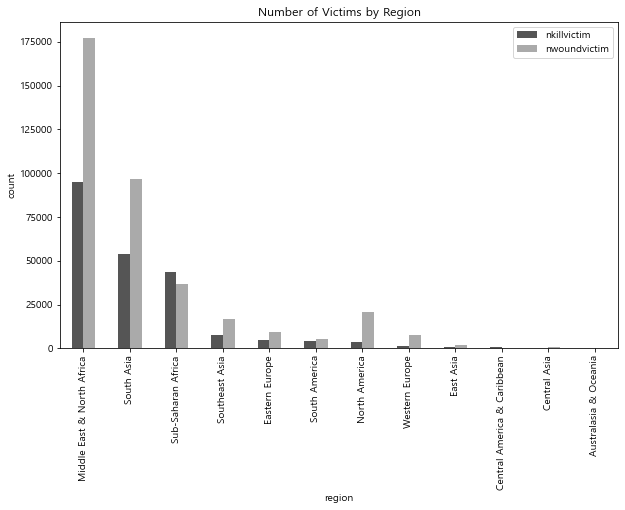

In [427]:
terror_data.groupby('region_txt')[['nkillvictim','nwoundvictim']].agg('sum').sort_values('nkillvictim', ascending=False)\
.plot(kind='bar', figsize=(10,6), color=sns.color_palette('gray',2))
plt.title('Number of Victims by Region')
plt.xlabel('region')
plt.ylabel('count')
plt.show();

- 테러가 가장 많이 발생한 두 지역 MENA와 SA에서의 테러로인한 사상자 피해도 가장 크다.

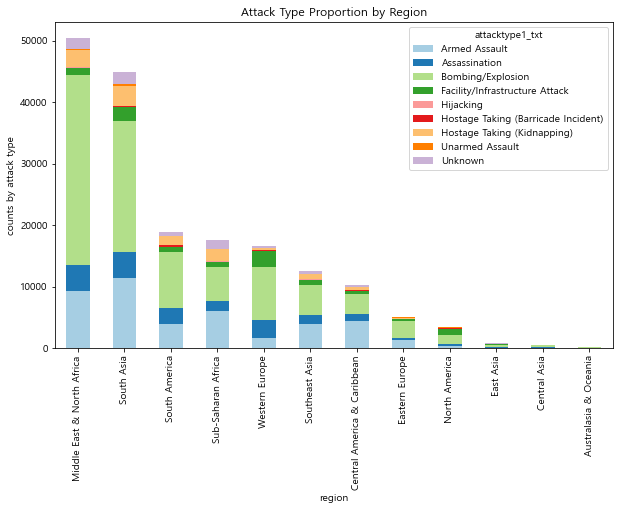

In [530]:
# proportion of types of attack 
pd.crosstab(terror_data['region_txt'], terror_data['attacktype1_txt'], margins=True).sort_values('All', ascending=False).iloc[1:, :-1]\
.plot.bar(stacked=True, figsize=(10,6), color=sns.color_palette('Paired', 9))
plt.xticks(rotation=90)
plt.title('Attack Type Proportion by Region')
plt.xlabel('region')
plt.ylabel('counts by attack type')
plt.show();

- 위 두 지역에서 가장 많이 사용된 테러 공격 또한 Bombing/Explosion과 Armed Assault이다.

## Terror Attack Trends Each Time/Year Period

In [634]:
# 10-year period 나눈 컬럼 생성
terror_data['year_range'] = pd.cut(terror_data['iyear'], bins=[1970, 1980, 1990, 2000, 2010, 2020], right=False, labels=['1970s', '1980s', '1990s', '2000s', '2010s'])
terror_data.head(1)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,nkillvictim,nwoundvictim,year_range
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,0,NaN,NaN,NaN,0.0,NaN,1,NaN,NaN,1970s


In [641]:
# number of terror attacks each 10-year period
terror_data['year_range'].value_counts().to_frame()

,year_range
2010s,86815
1980s,31160
1990s,28762
2000s,25040
1970s,9914


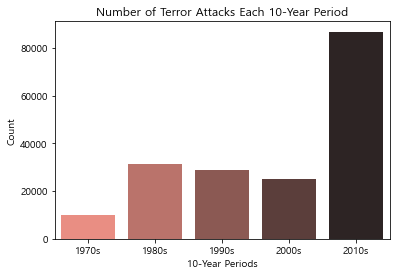

In [658]:
n_years = terror_data.groupby('year_range')['count'].sum().to_frame().reset_index()
sns.barplot(x=n_years.year_range, y=n_years['count'], palette='dark:salmon_r')
plt.xticks(rotation=0)
plt.title('Number of Terror Attacks Each 10-Year Period')
plt.xlabel('10-Year Periods')
plt.ylabel('Count')
plt.show();

## Terror Attack Trends by Regions Each Time/Year Period

In [635]:
# proportion changes of terror attacks by regions each 10-year period
round(pd.crosstab(terror_data['year_range'], terror_data['region_txt'], normalize='index', margins=True)*100, 1)

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year_range,,,,,,,,,,,,
1970s,0.2,9.3,0.0,0.8,0.3,11.0,16.1,10.2,0.5,2.0,2.4,47.3
1980s,0.3,24.0,0.0,0.4,0.1,9.3,1.8,31.1,9.2,3.5,5.1,15.3
1990s,0.4,6.4,1.2,1.4,3.7,18.9,2.3,20.0,16.8,5.7,9.3,13.8
2000s,0.1,0.2,0.6,0.4,5.3,32.4,1.1,4.6,32.1,10.8,6.9,5.6
2010s,0.1,0.0,0.1,0.1,3.1,38.0,0.4,1.6,33.6,7.9,13.0,2.1
All,0.2,5.7,0.3,0.4,2.8,27.8,1.9,10.4,24.8,6.9,9.7,9.2


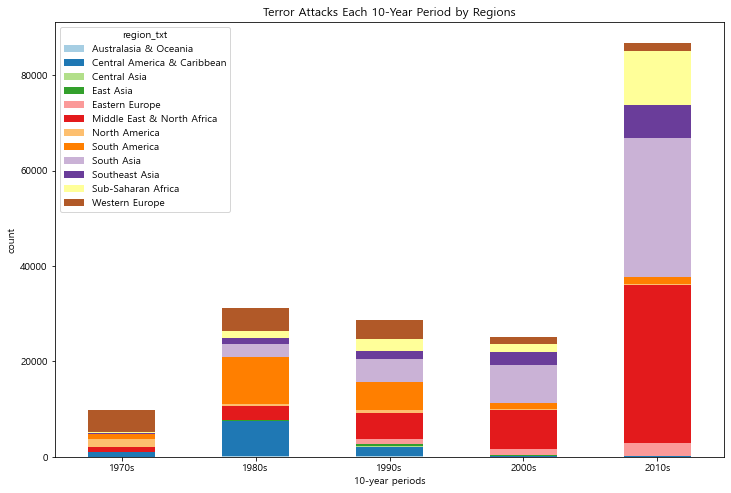

In [656]:
# terror attacks count and proportion by regions each 10-year period
pd.crosstab(terror_data['year_range'], terror_data['region_txt'])\
.plot.bar(stacked=True, figsize=(12,8), color=sns.color_palette('Paired', 12))
plt.xticks(rotation=0)
plt.title('Terror Attacks Each 10-Year Period by Regions')
plt.xlabel('10-year periods')
plt.ylabel('count')
plt.show();

- 1970년대 주로 서유럽에서 발생한 테러는 1980년대에는 라틴 아메리카, 1990년대 이후 중동·북아프리카·남아시아에서 주로 발생하였다.
- 특히, 2010년대에 중동·북아프리카·남아시아에서의 테러 발생 건수는 급격히 증가하였으며, 두 지역 외에도 사하라 사막 이남 아프리카 지역(Sub-Saharan Africa)과 동남아시아(Southeast Asia)에서도 크게 증가하였다.

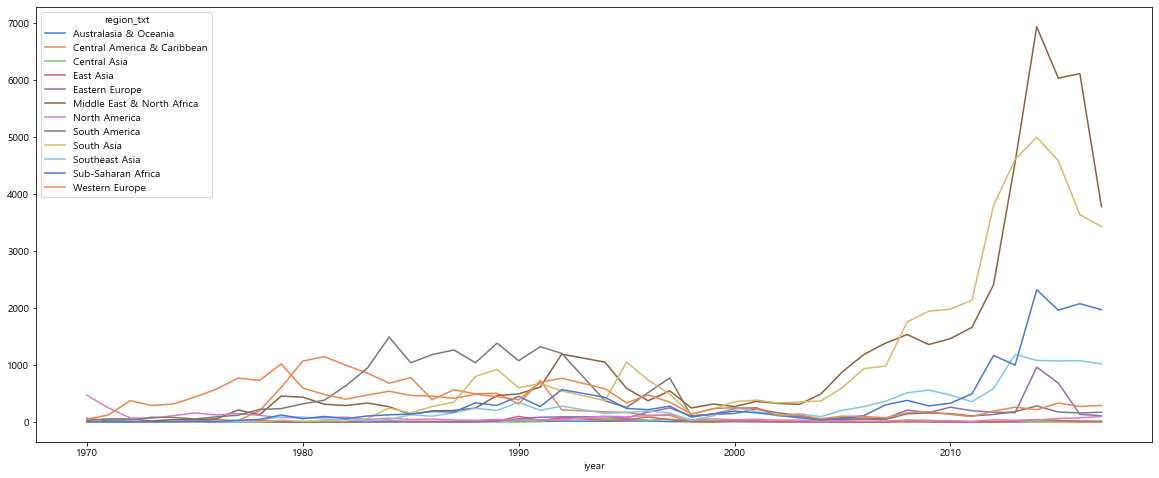

In [714]:
# number of terror attcks each year by regions
terror_region_by_year = pd.crosstab(terror_data.iyear, terror_data.region_txt)
terror_region_by_year.plot(color=sns.color_palette('muted', 12))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show();

## Terror Attack Trends by Terror Groups Each Time/Year Period

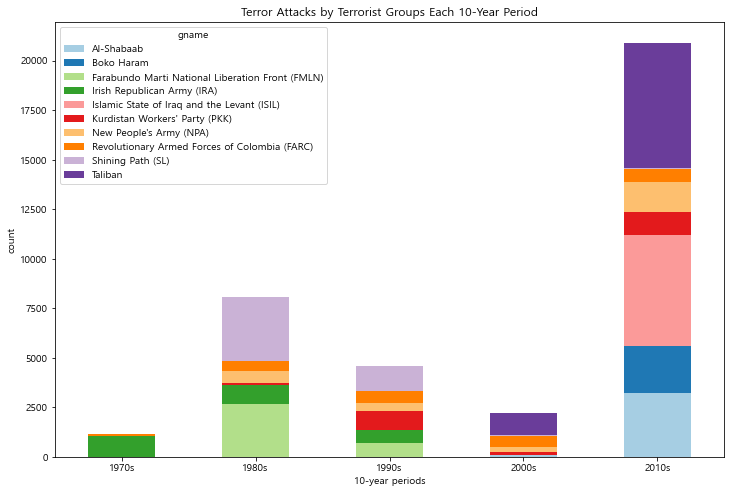

In [700]:
# terror attacks count and proportion by top 10 terrorist groups ('Unknown' removed) each 10-year period
pd.crosstab(top_groups10['year_range'], top_groups10['gname'])\
.plot.bar(stacked=True, figsize=(12,8), color=sns.color_palette('Paired', 10))
plt.xticks(rotation=0)
plt.title('Terror Attacks by Terrorist Groups Each 10-Year Period')
plt.xlabel('10-year periods')
plt.ylabel('count')
plt.show();

- 2010년대에 테러/무장 단체 Taliban, Islamic State(ISIS), Al-Shabaab, Boko Haram에 의한 테러 활동 건수가 급격히 증가하였다.

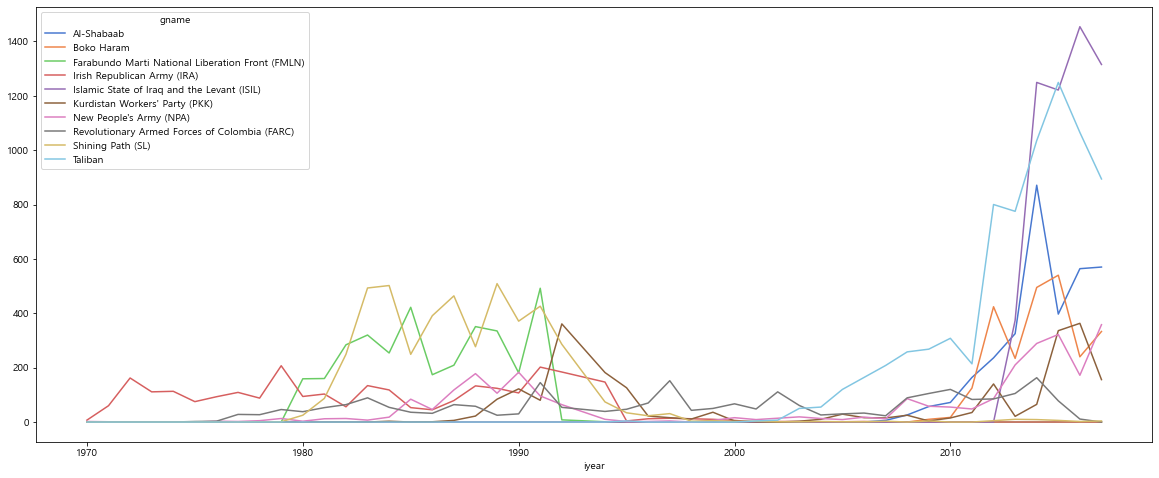

In [715]:
# Top 10 terrorist groups ('Unknown' removed) the whole period
top_groups10 = terror_data[terror_data['gname'].isin(terror_data['gname'].value_counts()[1:11].index)]
terror_group_by_year = pd.crosstab(top_groups10.iyear, top_groups10.gname)
terror_group_by_year.plot(color=sns.color_palette('muted', 10))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show();

- 2000년대 초 이후 미국의 아프가니스탄 군사적 개입을 계기로 Taliban의 테러 활동이 증가하기 시작한 것으로 보이며, 2011년 이후 Taliban과 새롭게 등장한 ISIS의 테러 활동이 급격히 증가한 것을 볼 수 있다.

## Terror Attack Trends in MENA, SA, Sub-Saharan Regions Each Time/Year Period

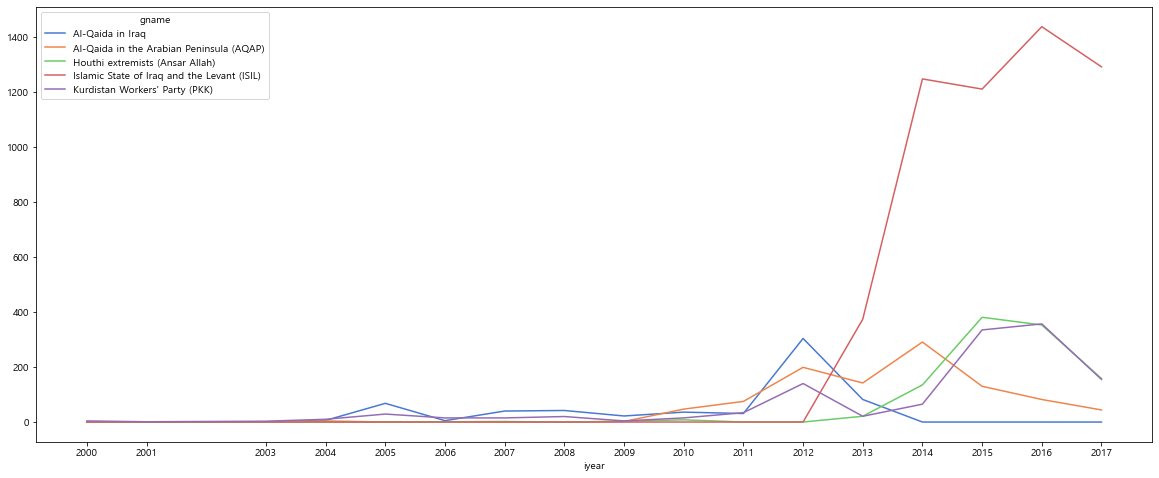

In [716]:
# Top 5 terror groups in Middle East & North Africa each year since 2000
region_MENA = terror_data[ (terror_data['region_txt'] == 'Middle East & North Africa') & (terror_data['iyear'] >= 2000)]
region_MENA = region_MENA[region_MENA['gname'].isin(region_MENA['gname'].value_counts()[1:6].index)]
pd.crosstab(region_MENA['iyear'], region_MENA['gname']).plot(color=sns.color_palette('muted', 5))
#plt.locator_params(integer=True) # Make the default locator to use integers
plt.gca().set_xticks(region_MENA['iyear'].unique()) # fixed locator to tick only the years present in the dataframe
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show();

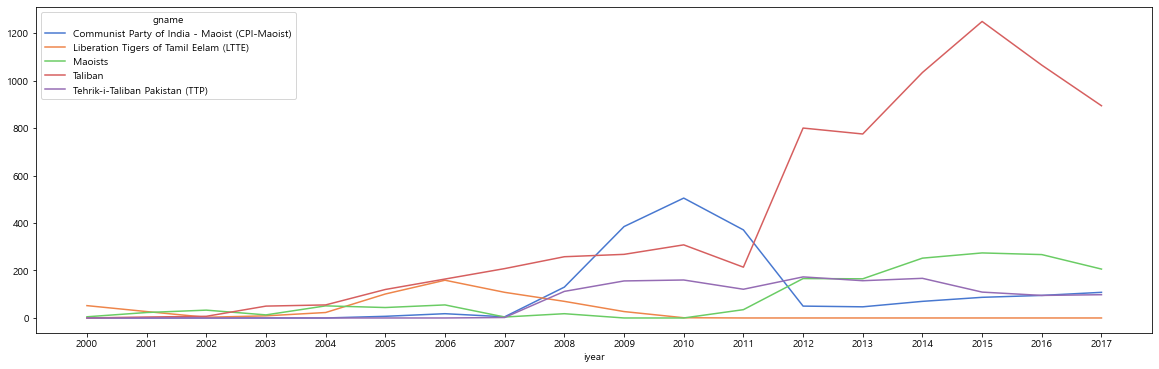

In [698]:
# Top 5 terror groups in South Asia each year since 2000
region_SA = terror_data[ (terror_data['region_txt'] == 'South Asia') & (terror_data['iyear'] >= 2000)]
region_SA = region_SA[region_SA['gname'].isin(region_SA['gname'].value_counts()[1:6].index)]
pd.crosstab(region_SA['iyear'], region_SA['gname']).plot(color=sns.color_palette('muted', 5))
plt.gca().set_xticks(region_SA['iyear'].unique())
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

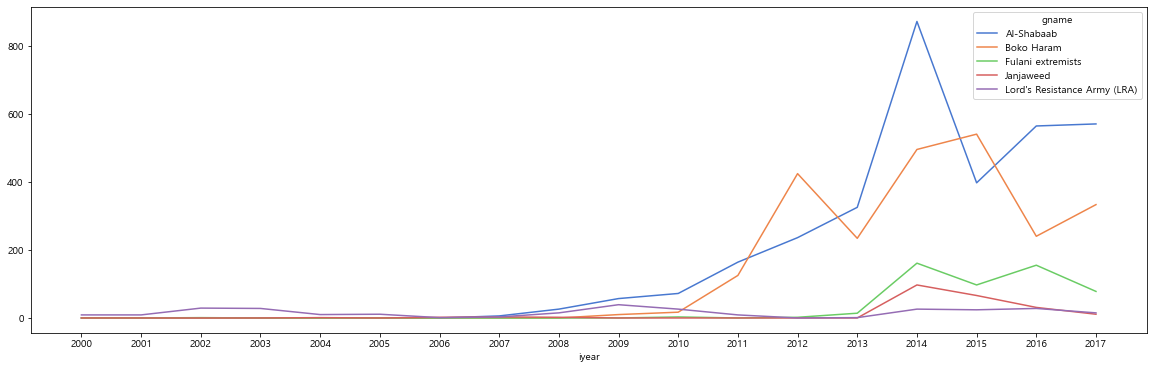

In [699]:
# Top 5 terror groups in Sub-Saharan Africa each year since 2000
region_Sub_Saharan = terror_data[ (terror_data['region_txt'] == 'Sub-Saharan Africa') & (terror_data['iyear'] >= 2000)]
region_Sub_Saharan = region_Sub_Saharan[region_Sub_Saharan['gname'].isin(region_Sub_Saharan['gname'].value_counts()[1:6].index)]
pd.crosstab(region_Sub_Saharan['iyear'], region_Sub_Saharan['gname']).plot(color=sns.color_palette('muted', 5))
plt.gca().set_xticks(region_Sub_Saharan['iyear'].unique())
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

- 2011년 이후 South Asia 지역에선 Taliban이, Middle East & North Africa 지역에선 새롭게 등장한 ISIS(ISIL)가, Sub-Saharan Africa 지역에선 Al-Shabaab, Boko Haram 등의 조직들의 세력 확장과 활발한 테러 활동으로 테러 발생 건수가 급증 하였다.

## Terror Attack Type Trends Each Time/Year Period

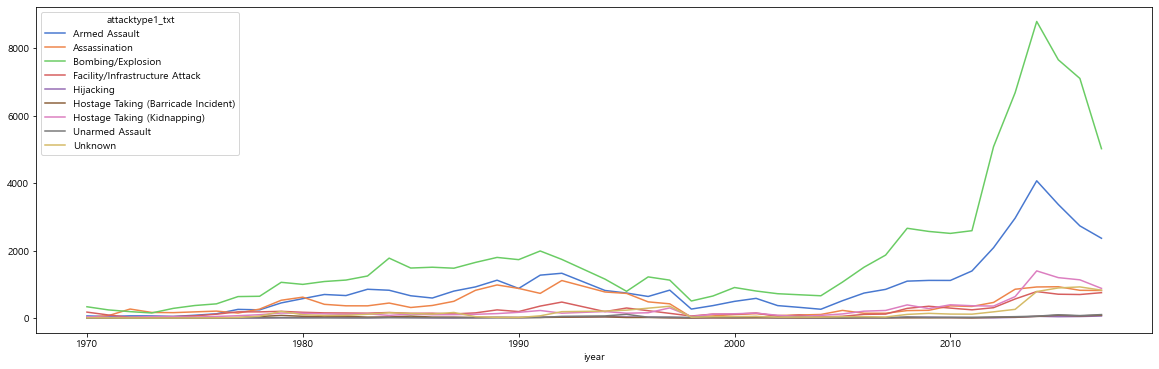

In [568]:
# terror attack types each year
attack_type_by_year = pd.crosstab(terror_data.iyear, terror_data.attacktype1_txt)
attack_type_by_year.plot(color=sns.color_palette('muted', 9))
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

- 테러 발생 건수 증가와 함께, Bombing/Explosion과 Armed Assault의 테러 사용 건수 또한 2011년 이후 급격히 증가하였다.

## Suicide (Attack) Each Year

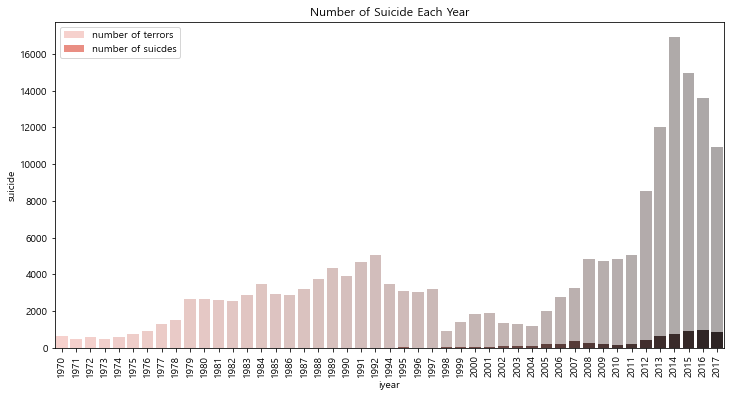

In [391]:
# number of suicide attacks
plt.figure(figsize=(12,6))

# number of terrors
yearly_terror = terror_data.groupby('iyear')['count'].sum().to_frame().reset_index()
sns.barplot(x=yearly_terror.iyear, y=yearly_terror['count'], palette='dark:salmon_r', label='number of terrors', alpha=0.4)
# number of suicides
n_suicide = terror_data.groupby('iyear')['suicide'].sum().to_frame().reset_index()
sns.barplot(x=n_suicide.iyear, y=n_suicide.suicide, palette='dark:salmon_r', label='number of suicdes')

plt.xticks(rotation=90)
plt.title('Number of Suicide Each Year')
plt.legend()
plt.show();

- 전체 테러 중 자살 공격의 비중이 크지는 않다.

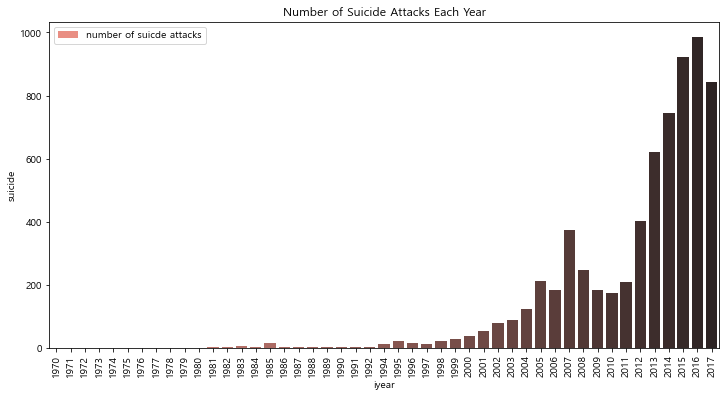

In [532]:
# number of suicide
plt.figure(figsize=(12,6))
n_suicide = terror_data.groupby('iyear')['suicide'].sum().to_frame().reset_index()
sns.barplot(x=n_suicide.iyear, y=n_suicide.suicide, palette='dark:salmon_r', label='number of suicde attacks')
plt.xticks(rotation=90)
plt.title('Number of Suicide Attacks Each Year')
plt.legend()
plt.show();

- 하지만 명백하게, 자살 공격이 행해지는 빈도수는 과거에 비해 급격히 증가하였다.

## Terror Attack Target Trends Each Time/Year Period

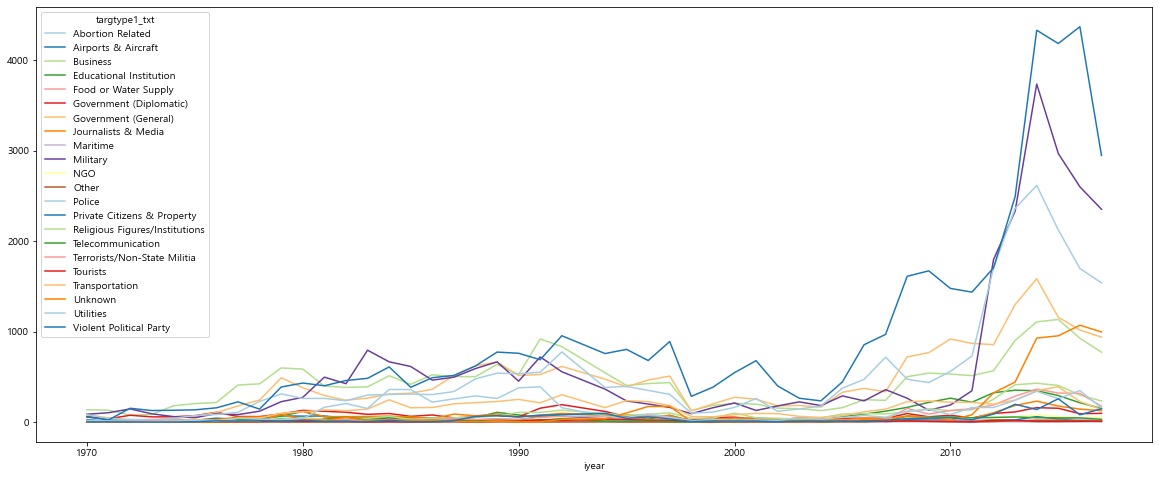

In [345]:
# terror target types each year
target_type_by_year = pd.crosstab(terror_data.iyear, terror_data.targtype1_txt)
target_type_by_year.plot(color=sns.color_palette('Paired', 20))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show();

- 군인(Military), 경찰(Police) 그리고 정부기관(Government) 등이 많은 테러의 타겟(target/victim)이 되어 왔지만, 결국 가장 많은 피해를 입은건 바로 민간인(Private Citizens & Property)이다.

---

# III. 요약

```
2000년대 중반부터 증가하기 시작한 테러 활동은, 2011년 아랍의 봄을 기점으로 급격히 증가하였다. 평화와 안정에 대한 기대는 사라졌고, 기존의 테러 조직과 새롭게 등장한 테러 단체는 더욱 활발히 활동하며 세력을 키웠다. 테러 공격의 증가와 폭발물/폭탄 사용의 증가로 사상자 수 또한 급격히 증가하였다.

더욱이, 중동과 남아시아의 문제라고만 여겨졌던 "테러"는 어느새 사하라 이남 아프리카와 동남아시아로까지 확대되었다.

테러 활동 및 세력의 확대는 국제 테러단체들의 물리적인 이동의 영향도 있지만, 인터넷/디지털 상에서 테러단체들의 선동에 현혹되어 급진의식화 되거나 아랍과 무슬림에 대한 편견과 차별로 무슬림 이주민들이 폭력적 극단주의자가 되어버리는 '외로운 늑대(Lone Wolf)' 그리고 이로 인한 '자생 테러'의 발생은 전 세계적인 위협으로 떠올랐다.

이번 데이터를 근거로 'Counter terrorism'을 위해 국제사회가 해야하는 것은 무엇인지 생각해 보았다.

첫째, 불법적인 무기, 화학물 그리고 자금 거래에 대한 국제적인 모니터링 시스템을 구축해야 하며, 지속적이고 적극적인 모니터링과 대응으로 사전 예방(prevention)이 되어야 한다.
둘째, 테러의 확산을 방지하기 위해 국민들에 대한 국가적인 교육과 관심 및 지원이 필요하다. 청년들과 무슬림 이주민 2-3세 자녀들이 극단적 폭력주의에 현혹되지 않고 자생적 테러리스트가 되지 않기 위해선, 그들에 대한 관심과 지원이 필요하며, 또한 무슬림에 대한 편견과 차별이 사라지도록 이를 위한 교육이나 프로그램이 필요하다. 그리고 SNS 등 플랫폼 기업들의 디지털/온라인 상에서의 혐오표현(hate speech)이나 폭력적 극단주의(violent extremism) 컨텐츠를 삭제하는 등 적극적인 모니터링과 대응도 필요하다.
```